 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col= 'Date', 
                               infer_datetime_format = True, parse_dates = True)
whale_returns_df.sort_index(inplace = True)
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df.dropna(inplace = True)
whale_returns_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_df = pd.read_csv(algo_returns_csv, index_col= 'Date', 
                               infer_datetime_format = True, parse_dates = True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
# Count nulls
# YOUR CODE HERE
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_returns_df.dropna(inplace = True)
algo_returns_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_df = pd.read_csv(sp500_history_csv, index_col= 'Date', 
                               infer_datetime_format = True, parse_dates = True)
sp500_history_df.sort_index(inplace = True)
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
# YOUR CODE HERE
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')
sp500_history_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
sp500_history_df.dtypes


Close    object
dtype: object

In [13]:
sp500_history_df['Close'] = sp500_history_df['Close'].astype(float)

In [14]:
sp500_history_df.dtypes

Close    float64
dtype: object

In [15]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [16]:
# Drop nulls
# YOUR CODE HERE
sp500_returns.dropna(inplace = True)

In [17]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns = ["S&P 500"]
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined_returns = pd.concat([whale_returns_df, algo_returns_df,sp500_returns], 
                             axis = 'columns', join = 'inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

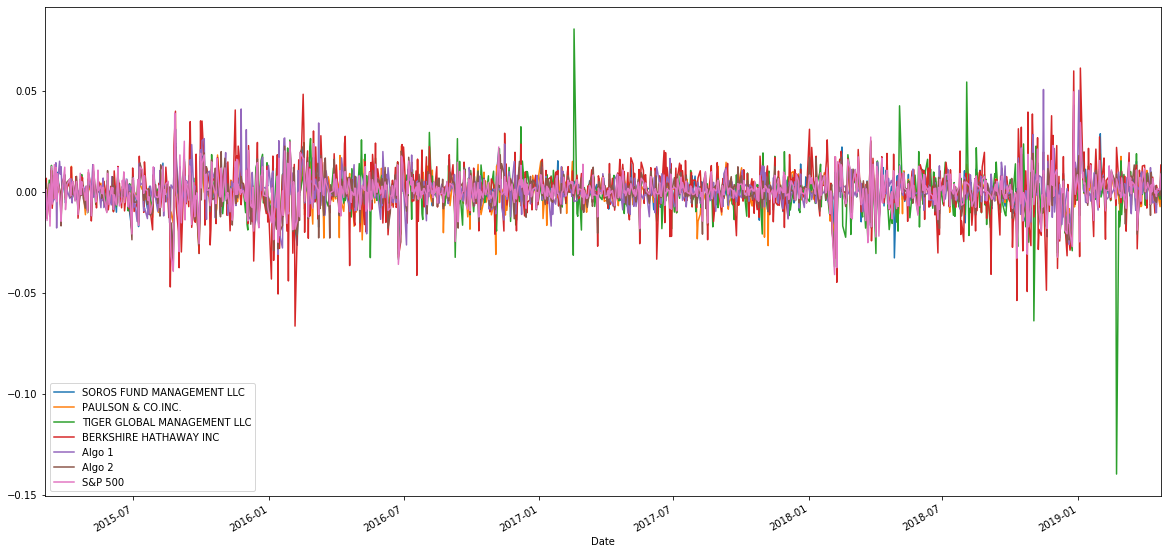

In [19]:
# Plot daily returns
# YOUR CODE HERE
combined_returns.plot(figsize=(20,10))

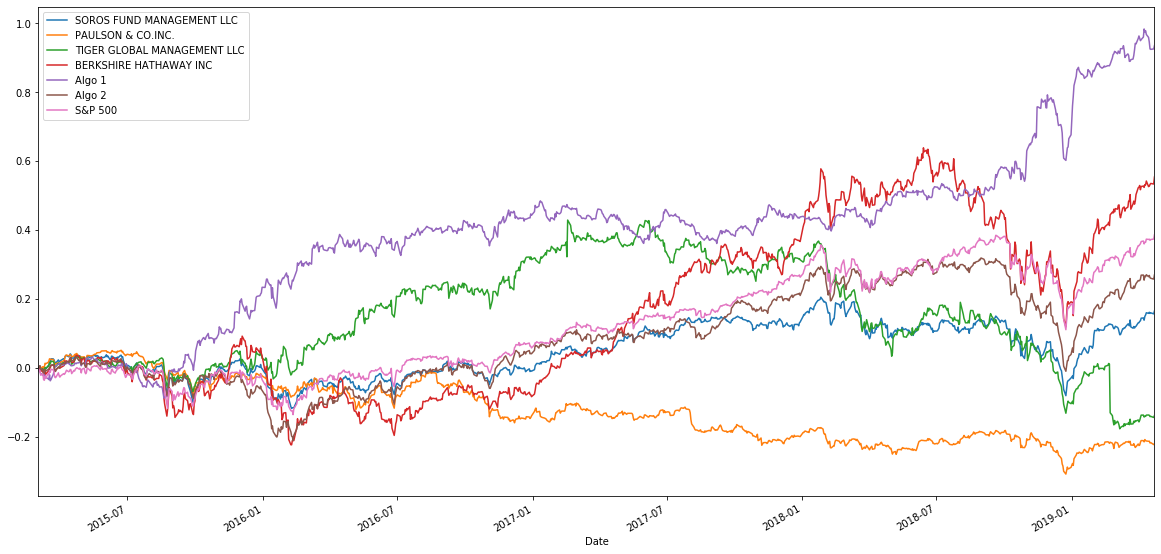

In [20]:
# Plot cumulative returns
# YOUR CODE HERE
((1+combined_returns).cumprod()-1).plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

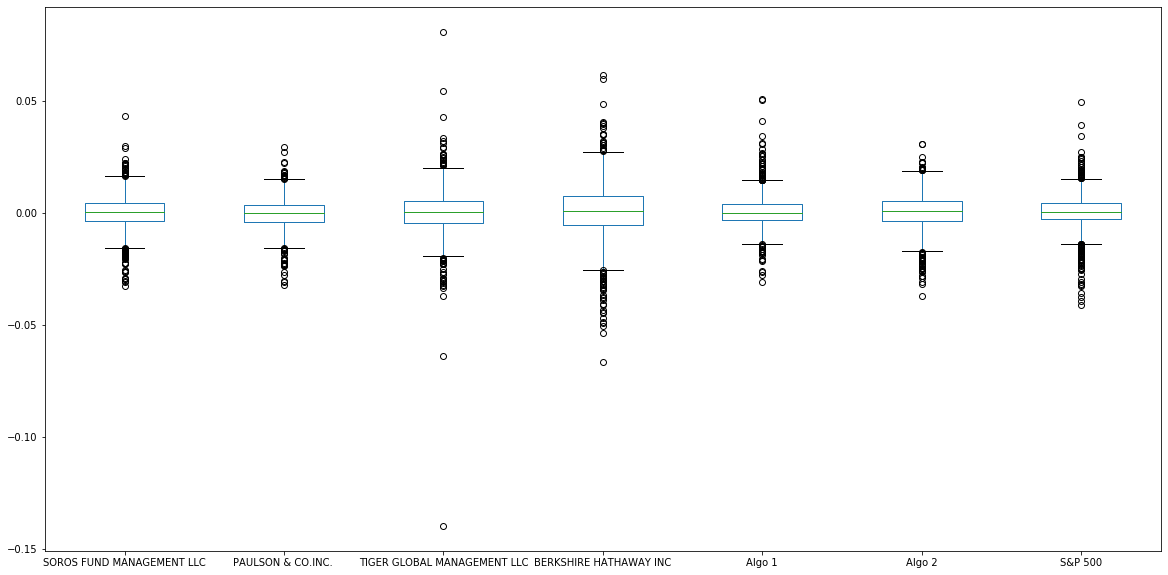

In [21]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns.plot.box(figsize=(20,10))

The box plot above shows that Berkshire Hathaway Inc has the biggest spread.Algo 1 has the smallest spread, but it has also has some outliers. 

In [22]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
combined_returns_std = combined_returns.std()

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
combined_returns_std.sort_values(ascending = False, inplace = True)
combined_returns_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

Based on the standard deviation for each portfofio, we can determine that Berkshire Hathaway Inc and Tiger Global Management LLC are riskier than the S&P 500

In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = combined_returns_std*np.sqrt(252)
annualized_std.sort_values(inplace = True)
annualized_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

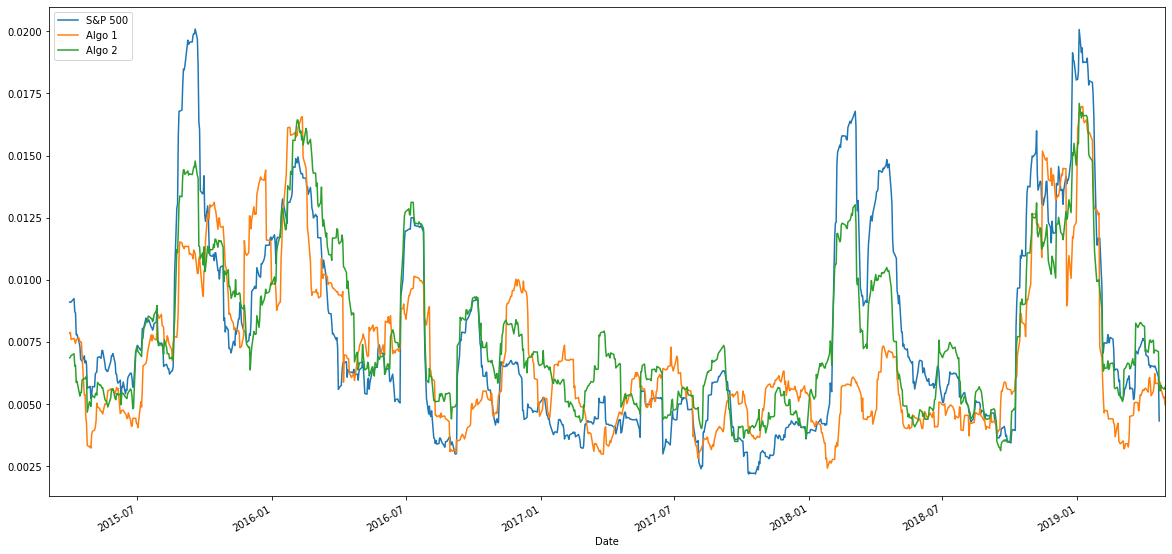

In [25]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
# YOUR CODE HERE
ax = sp500_returns['2015-03-03':].rolling(window=21).std().plot(figsize=(20,10))
#whale_returns_df['2015-03-03':].rolling(window=21).std().plot(ax=ax)
algo_returns_df['2015-03-03':].rolling(window=21).std().plot(ax=ax)

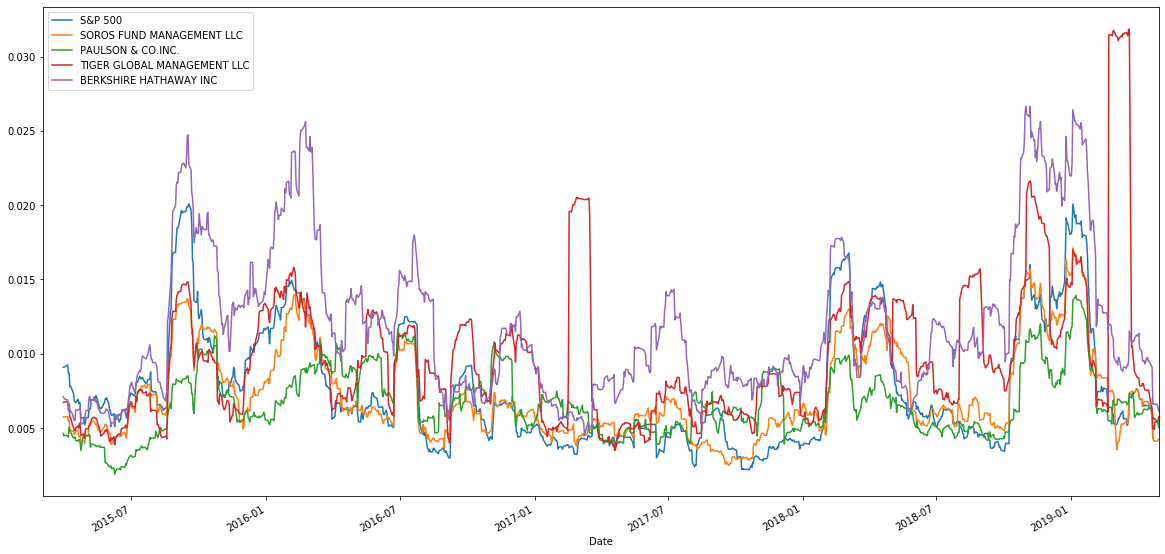

In [26]:
ax = sp500_returns['2015-03-03':].rolling(window=21).std().plot(figsize=(20,10))
whale_returns_df['2015-03-03':].rolling(window=21).std().plot(ax=ax)

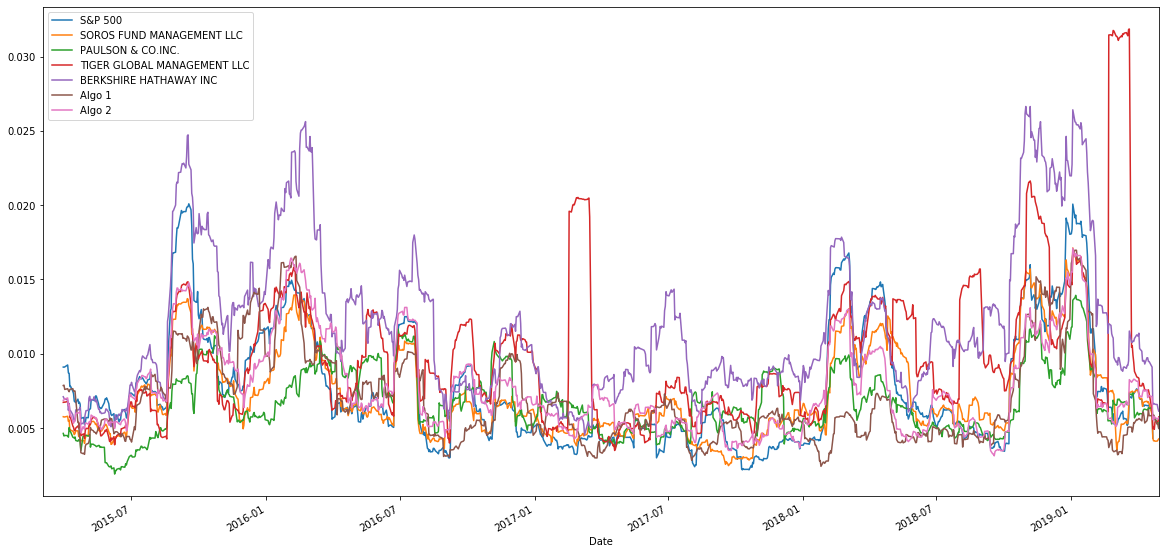

In [27]:
ax = sp500_returns['2015-03-03':].rolling(window=21).std().plot(figsize=(20,10))
whale_returns_df['2015-03-03':].rolling(window=21).std().plot(ax=ax)
algo_returns_df['2015-03-03':].rolling(window=21).std().plot(ax=ax)

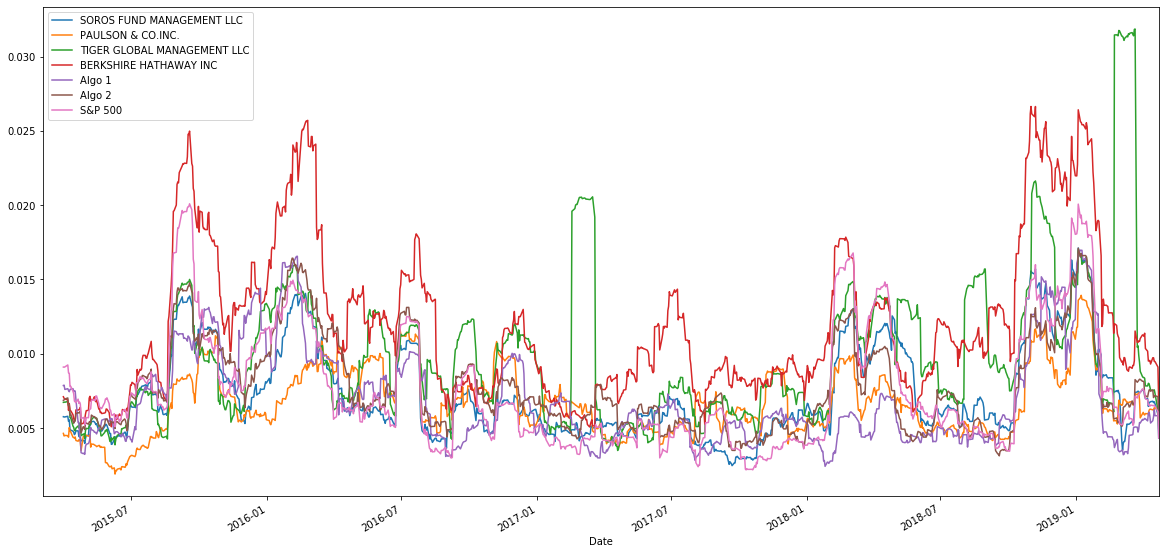

In [28]:
combined_returns.rolling(window=21).std().plot(figsize=(20,10))

The risk for the algorithmic porfolio seems to increase at the same time risk increases in the S&P 500. The risk for the whale porfolio also seems to be moving in the same direction as the the S&P 500 for the most part, but we can also observe a big difference with Tiger Global Management LLC risk movement. 

In [29]:
# Correlation
# YOUR CODE HERE
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


The returns that most closely mimic the S&P 500 are: Algo 2, Soros Fund Management LLC, and Berkshire Hathaway Inc. 

In [88]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
covariance = combined_returns['Algo 1'].cov(combined_returns['S&P 500'])
covariance

1.8217749991632826e-05

In [31]:
variance = combined_returns['S&P 500'].var()

In [85]:
beta = covariance/variance
beta

0.24899091459425748

The beta is low and closer to zero, therefore we can say that Algo 1 does not seem sensitive to movements in the S&P 500. 

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

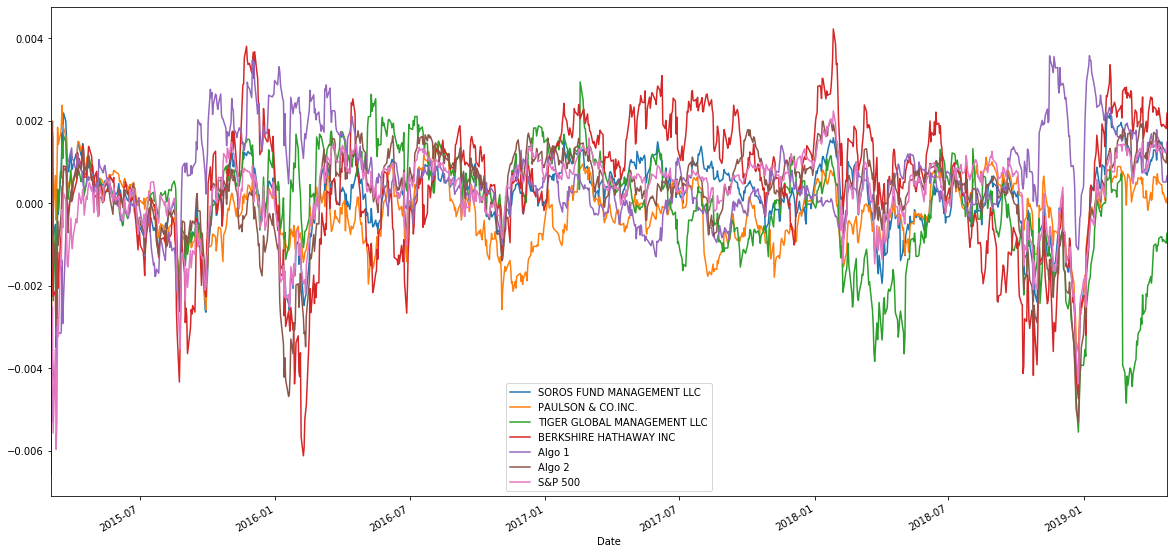

In [33]:
# (OPTIONAL) YOUR CODE HERE
combined_returns.ewm(halflife=21).mean().plot(figsize=(20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [34]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
annualized_sr = (combined_returns.mean()*252)/annualized_std
annualized_sr.sort_values(inplace=True)
annualized_sr

PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
SOROS FUND MANAGEMENT LLC      0.356417
Algo 2                         0.501364
BERKSHIRE HATHAWAY INC         0.621810
S&P 500                        0.648267
Algo 1                         1.378648
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

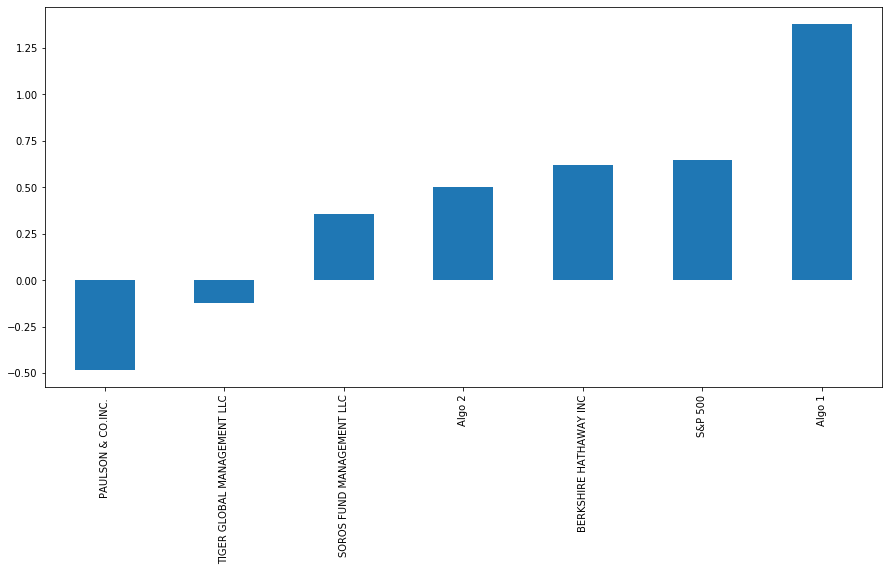

In [35]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
annualized_sr.plot(kind='bar', figsize=(15,7))

Based on the sharp ratio comparison, we can determine that algo 1 outperforms both the S&P 500 and the whales portfolios. Although Algo 2 has a lower sharp ratio than both Berkshire Hathaway Inc and the S&P 500, we can conclude that the algorithmic strategies porfolios are outperforming the market and the whales portfolios. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [36]:
# Read the first stock
# YOUR CODE HERE
apple_path = Path('Resources/apple_history.csv')
apple_df = pd.read_csv(apple_path, index_col = 'Date', 
                       infer_datetime_format = True, parse_dates = True)
apple_df.head()

,Close
Date,
2017-05-01,146.58
2017-05-02,147.51
2017-05-03,147.06
2017-05-04,146.53
2017-05-05,148.96


In [37]:
# Read the second stock
# YOUR CODE HERE
exxonMobile_path = Path('Resources/exxonMobile_history.csv')
exxonMobile_df = pd.read_csv(exxonMobile_path, index_col = 'Date',
                            infer_datetime_format = True, parse_dates = True)
exxonMobile_df.tail()

,Close
Date,
2019-04-24,81.76
2019-04-25,82.22
2019-04-26,80.49
2019-04-29,79.97
2019-04-30,80.28


In [38]:
# Read the third stock
# YOUR CODE HERE
apache_path = Path('Resources/apache_corporation_history.csv')
apache_df = pd.read_csv(apache_path, index_col= 'Date', 
                       infer_datetime_format = True, parse_dates = True)
apache_df.head()

,Close
Date,
2017-05-01,48.79
2017-05-02,48.47
2017-05-03,48.80
2017-05-04,47.90
2017-05-05,49.29


In [39]:
travelers_path = Path('Resources/travelers_companies_history.csv')
travelers_df = pd.read_csv(travelers_path, index_col = 'Date', 
                           infer_datetime_format = True, parse_dates = True)
travelers_df.head()

,Close
Date,
2017-05-01,48.79
2017-05-02,48.47
2017-05-03,48.80
2017-05-04,47.90
2017-05-05,49.29


In [40]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_port_df = pd.concat([apple_df,exxonMobile_df,apache_df,travelers_df], axis = 'columns', join = 'inner')
my_port_df.head()

,Close,Close,Close,Close
Date,,,,
2017-05-01,146.58,82.06,48.79,48.79
2017-05-02,147.51,82.05,48.47,48.47
2017-05-03,147.06,82.70,48.80,48.80
2017-05-04,146.53,81.64,47.90,47.90
2017-05-05,148.96,82.02,49.29,49.29


In [41]:
my_port_df.columns = ['APPL','XON', 'APA', 'TRV']
my_port_df.head()

,APPL,XON,APA,TRV
Date,,,,
2017-05-01,146.58,82.06,48.79,48.79
2017-05-02,147.51,82.05,48.47,48.47
2017-05-03,147.06,82.70,48.80,48.80
2017-05-04,146.53,81.64,47.90,47.90
2017-05-05,148.96,82.02,49.29,49.29


In [42]:
# Reset the index
# YOUR CODE HERE
my_port_df.sort_index(inplace = True)

In [43]:
my_port_df.dtypes

APPL    float64
XON     float64
APA     float64
TRV     float64
dtype: object

In [44]:
my_port_df.count()

APPL    503
XON     503
APA     503
TRV     503
dtype: int64

In [45]:
my_port_df.dropna(inplace = True)

In [46]:
my_port_df.head()

,APPL,XON,APA,TRV
Date,,,,
2017-05-01,146.58,82.06,48.79,48.79
2017-05-02,147.51,82.05,48.47,48.47
2017-05-03,147.06,82.70,48.80,48.80
2017-05-04,146.53,81.64,47.90,47.90
2017-05-05,148.96,82.02,49.29,49.29


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [47]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4,1/4]
# YOUR CODE HERE
daily_returns = my_port_df.pct_change()
daily_returns.dropna(inplace=True)

In [48]:
daily_returns.head()

,APPL,XON,APA,TRV
Date,,,,
2017-05-02,0.006345,-0.000122,-0.006559,-0.006559
2017-05-03,-0.003051,0.007922,0.006808,0.006808
2017-05-04,-0.003604,-0.012817,-0.018443,-0.018443
2017-05-05,0.016584,0.004655,0.029019,0.029019
2017-05-08,0.027189,0.010607,0.019477,0.019477


In [49]:
my_port_returns = daily_returns.dot(weights)

In [50]:
my_port_returns

Date
2017-05-02   -0.001724
2017-05-03    0.004622
2017-05-04   -0.013327
2017-05-05    0.019819
2017-05-08    0.019187
                ...   
2019-04-24   -0.018282
2019-04-25   -0.020873
2019-04-26   -0.021134
2019-04-29    0.001184
2019-04-30   -0.008511
Length: 502, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [51]:
# YOUR CODE HERE
final_portfolio_returns = pd.concat([my_port_returns, combined_returns], axis = 'columns', join = 'inner')

In [52]:
final_portfolio_returns.rename(columns={0:"Custom Portfolio"}, inplace = True)

In [53]:
final_portfolio_returns.head()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2017-05-02,-0.001724,-0.001353,0.004830,-0.002498,-0.009444,-0.002307,-0.002532,0.001189
2017-05-03,0.004622,0.000230,-0.012176,-0.001345,-0.013861,0.000442,-0.006452,-0.001267
2017-05-04,-0.013327,-0.001156,0.003736,0.004030,0.003856,-0.011146,-0.001577,0.000578
2017-05-05,0.019819,0.014021,0.004499,0.001293,0.016913,0.007084,0.005394,0.004089
2017-05-08,0.019187,-0.006287,-0.006418,-0.002812,0.013759,0.000915,-0.002253,0.000038


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
final_portfolio_returns.dropna(inplace=True)

In [55]:
final_portfolio_returns.shape

(497, 8)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

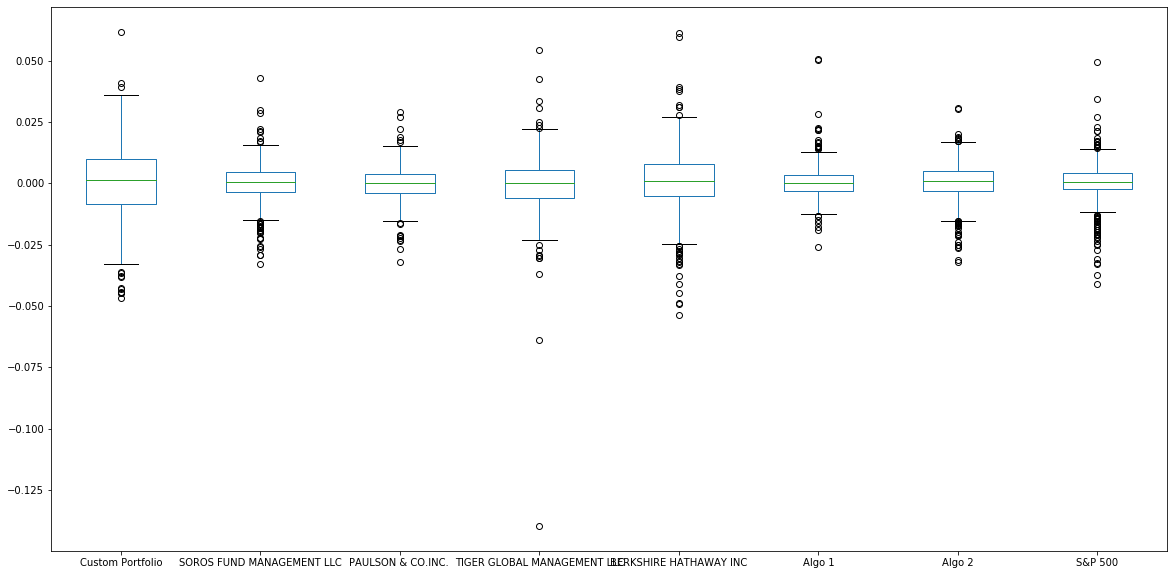

In [59]:
final_portfolio_returns.plot.box(figsize=(20,10))

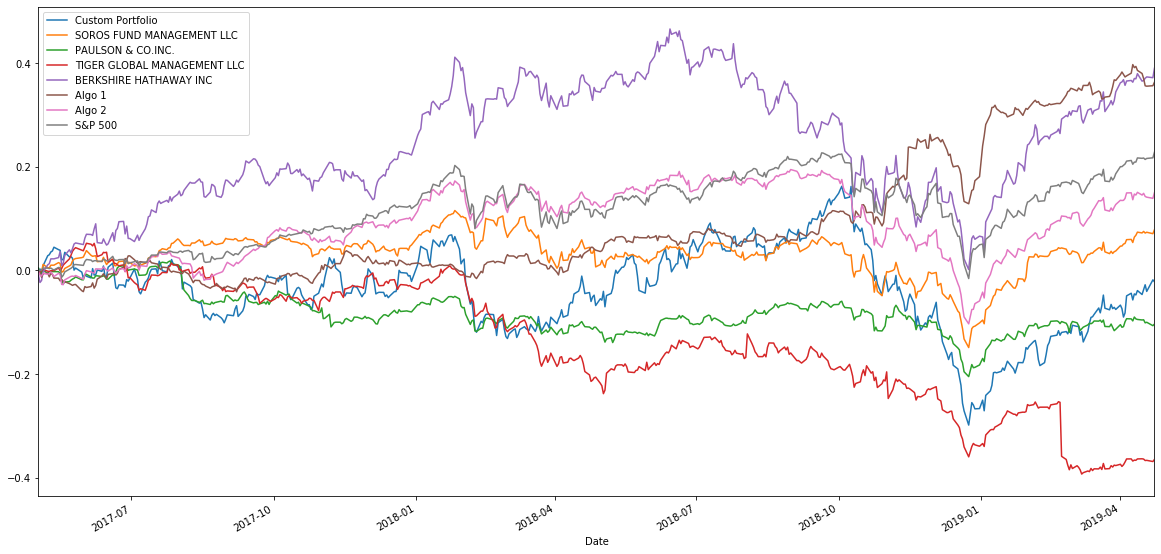

In [61]:
((1+final_portfolio_returns).cumprod()-1).plot(figsize=(20,10))

In [62]:
# Risk
# YOUR CODE HERE
final_portfolio_returns.std().sort_values()

Algo 1                         0.006928
PAULSON & CO.INC.              0.006961
Algo 2                         0.007809
SOROS FUND MANAGEMENT LLC      0.008245
S&P 500                        0.008612
TIGER GLOBAL MANAGEMENT LLC    0.012008
BERKSHIRE HATHAWAY INC         0.013170
Custom Portfolio               0.015114
dtype: float64

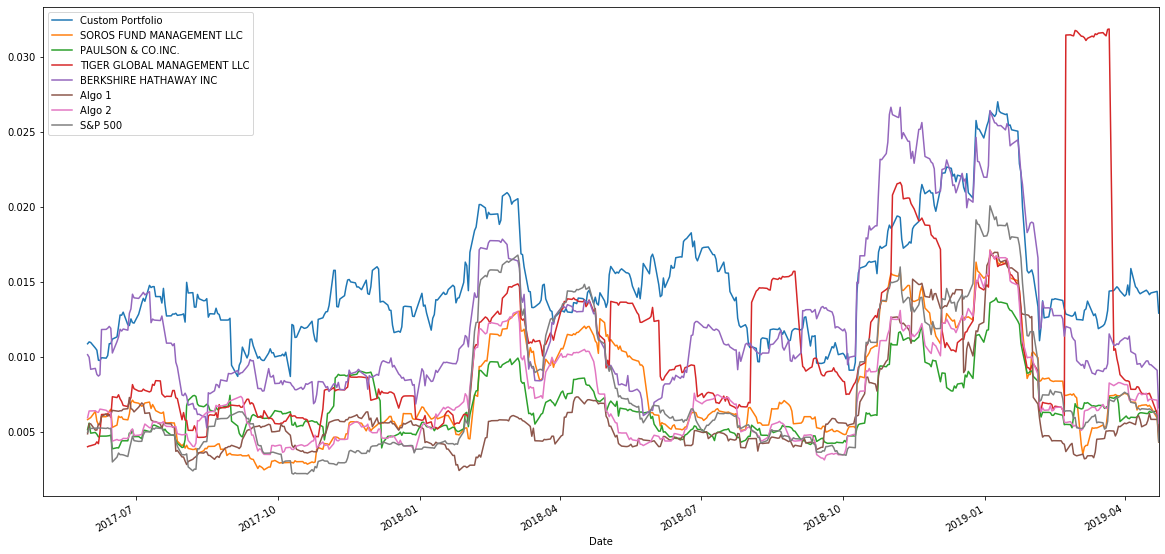

In [64]:
# Rolling
# YOUR CODE HERE
final_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10))

In [68]:
# Beta
# YOUR CODE HERE
covariance_b = final_portfolio_returns['Custom Portfolio'].cov(final_portfolio_returns['S&P 500'])
variance_b = final_portfolio_returns['Custom Portfolio'].var()

In [70]:
beta_b = covariance_b/variance_b
beta_b

0.36260864642456386

In [71]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharp_ratio_b = (final_portfolio_returns.mean()*252)/(final_portfolio_returns.std()*np.sqrt(252))

In [74]:
sharp_ratio_b.sort_values(inplace=True)

In [75]:
sharp_ratio_b

TIGER GLOBAL MANAGEMENT LLC   -1.108853
PAULSON & CO.INC.             -0.445923
Custom Portfolio               0.073349
SOROS FUND MANAGEMENT LLC      0.359019
Algo 2                         0.634901
S&P 500                        0.831361
BERKSHIRE HATHAWAY INC         0.904321
Algo 1                         1.484568
dtype: float64

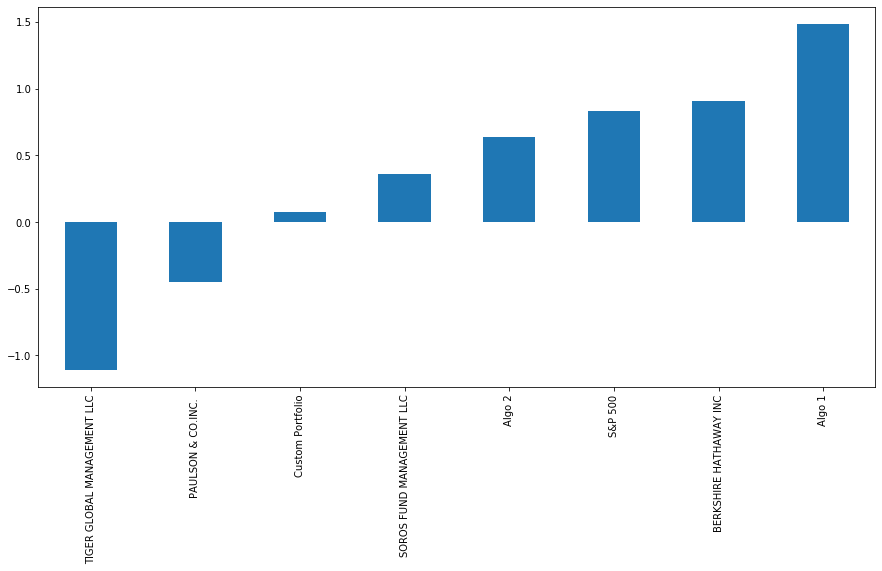

In [76]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharp_ratio_b.plot(kind='bar', figsize=(15,7))

## Include correlation analysis to determine which stocks (if any) are correlated

In [78]:
# YOUR CODE HERE
import seaborn as sns

In [81]:
correlation_b = final_portfolio_returns.corr()
correlation_b

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Custom Portfolio,1.000000,0.587473,0.529574,0.329597,0.513632,0.254878,0.636036,0.636386
SOROS FUND MANAGEMENT LLC,0.587473,1.000000,0.713078,0.508600,0.766614,0.285133,0.802981,0.820571
PAULSON & CO.INC.,0.529574,0.713078,1.000000,0.463588,0.585502,0.299722,0.737055,0.714987
TIGER GLOBAL MANAGEMENT LLC,0.329597,0.508600,0.463588,1.000000,0.374083,0.109173,0.464737,0.553923
BERKSHIRE HATHAWAY INC,0.513632,0.766614,0.585502,0.374083,1.000000,0.257771,0.746706,0.808801
Algo 1,0.254878,0.285133,0.299722,0.109173,0.257771,1.000000,0.292380,0.248013
Algo 2,0.636036,0.802981,0.737055,0.464737,0.746706,0.292380,1.000000,0.870845
S&P 500,0.636386,0.820571,0.714987,0.553923,0.808801,0.248013,0.870845,1.000000


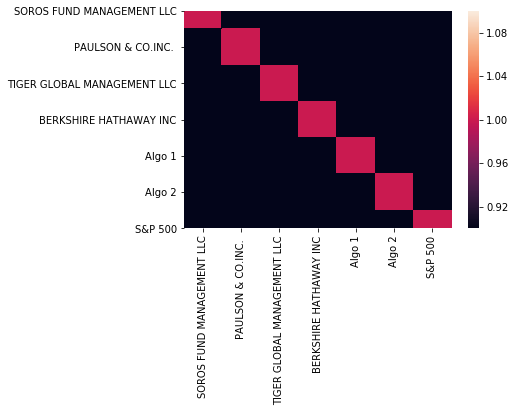

In [84]:
sns.heatmap(correlation, vmax=1, vmin=1)

Based on performance and risk analysis, my portfolio didn't fair well compared to the S&P 500 and the existing porfolios. It has the highest risk based on the standard deviation. It has a positive sharp ratio, but it doesn't outperfrom the algorithmic portfolio, which we had already determined was the best strategy. It also has a lower sharp ratio than the market. Finally, based on beta calculation, we can conclude that my portfolio is not sensitive to movements in the S&P 500. 